In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
from sklearn.cluster import KMeans
from PIL import Image

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

image = mpimg.imread("/Users/swagatpradhan/Desktop/sem1/ML/Assignment2/Assignment2_files/Assignment2_image.jpg")
print(image.shape)
image_sizeX ,image_sizeY, image_sizeZ = image.shape
image_size = image_sizeX*image_sizeY*image_sizeZ

(2000, 2000, 3)


In [2]:
import os
#custom saving path
custom_path = '/Users/swagatpradhan/Desktop/sem1/ML/Assignment2/Assignment2_files/'
get_ipython().run_line_magic('cd', custom_path)

/Users/swagatpradhan/Desktop/sem1/ML/Assignment2/Assignment2_files


In [3]:
def Kmeans_compress(block_size, num_clusters, input_image):
    compressed_blocks = []
    image_width, image_height, _ = input_image.shape
    #total_mse = 0.0

    for x in range(0, image_width, block_size):
        for y in range(0, image_height, block_size):
            image_block = input_image[x:x+block_size, y:y+block_size, :].copy()
            block_width, block_height, _ = image_block.shape

            if (block_width * block_height) < (block_size * block_size):
                augment_size = int((block_size * block_size) / (block_width * block_height))
                temp = [image_block.tolist() for _ in range(augment_size)]
                image_block = np.array(temp).reshape(block_size * block_size * 3)

            try:
                image_block = image_block.reshape(block_size * block_size * 3)
                compressed_blocks.append(image_block)
            except Exception as e:
                print("Exception,", x, y, image_block.shape)
                print(e)

    kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init="auto").fit(compressed_blocks)
    labels = kmeans.labels_
    cluster_centers = np.round(kmeans.cluster_centers_)

    for i in range(len(compressed_blocks)):
        compressed_blocks[i] = cluster_centers[labels[i]]
        # mse = np.mean((compressed_blocks[i] - image_block) ** 2)
        # total_mse += mse

    block_counter = 0
    for x in range(0, image_width, block_size):
        for y in range(0, image_height, block_size):
            block_width, block_height, _ = input_image[x:x+block_size, y:y+block_size, :].shape

            if block_width * block_height < block_size * block_size:
                temp = compressed_blocks[block_counter]
                temp = temp[:block_width * block_height * 3]
                compressed_blocks[block_counter] = temp

            reconstructed_block = compressed_blocks[block_counter].reshape(block_width, block_height, 3)
            input_image[x:x+block_size, y:y+block_size, :] = reconstructed_block.copy()
            block_counter += 1
    #overall_mse = total_mse / len(compressed_blocks)
    
    return input_image #, overall_mse


# Question 1: Above is the function for Image compression, done using windows (segmentation of Image) and reconstructed into compressed image

 
 the reconstruction error of k=4 and c=20: 92.6764315


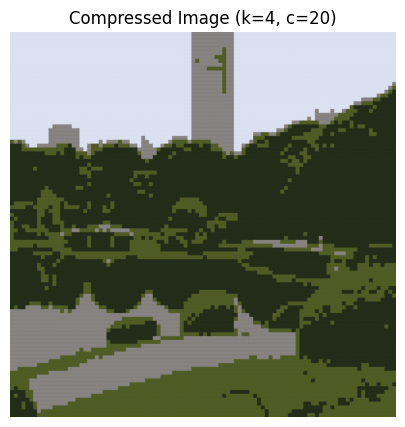

 
 the reconstruction error of k=4 and c=40: 92.44408741666666


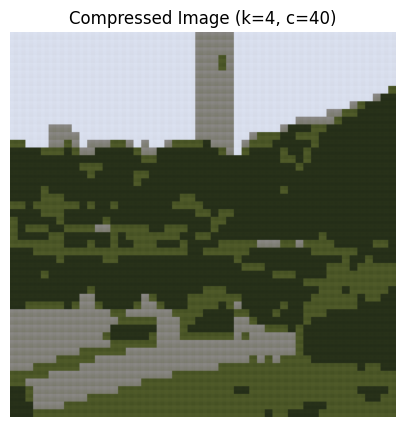

 
 the reconstruction error of k=4 and c=60: 98.27371666666667


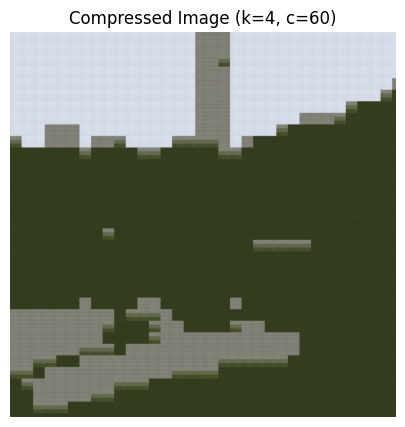

 
 the reconstruction error of k=8 and c=20: 98.1995665


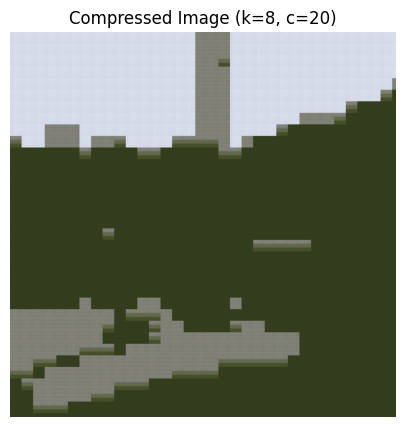

 
 the reconstruction error of k=8 and c=40: 99.21041408333333


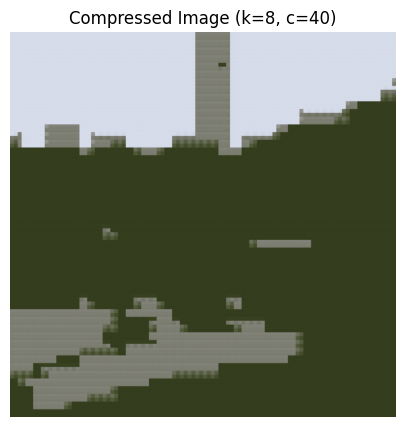

 
 the reconstruction error of k=8 and c=60: 99.299957


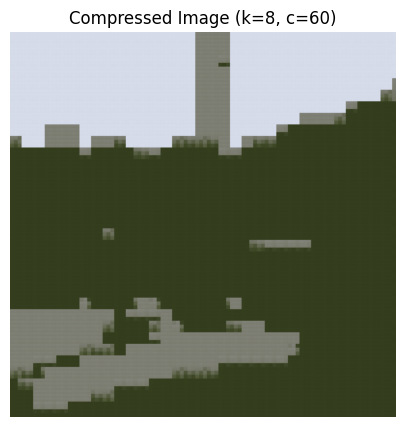

 
 the reconstruction error of k=16 and c=20: 99.36211583333333


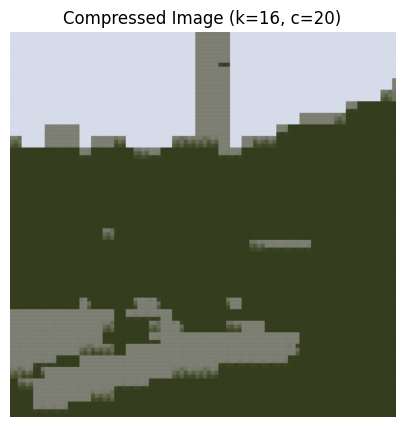

 
 the reconstruction error of k=16 and c=40: 99.26319075


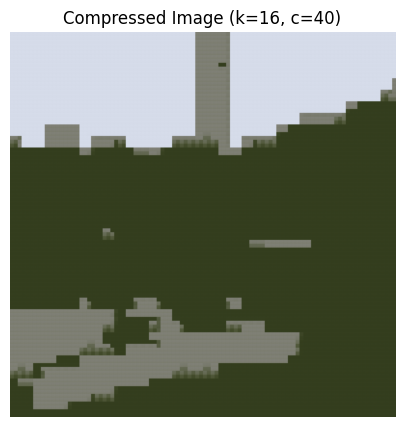

 
 the reconstruction error of k=16 and c=60: 99.23165975


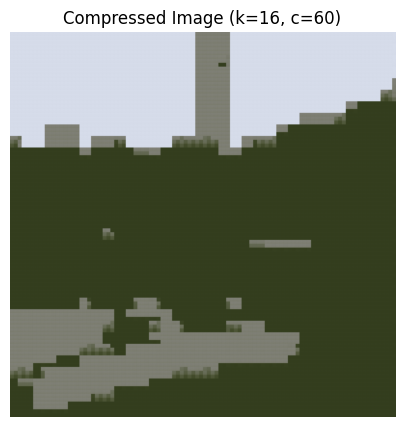

In [4]:
k_values = [4, 8, 16]
c_values = [20, 40, 60]
image= np.array(image)
#h, w, _ = image.shape
new_image = image.copy()
RE=0
for k in k_values:
    for c in c_values:
        new_image2= Kmeans_compress(c,k,new_image)
        RE= (np.sum((image-new_image2)**2))/image_size
        print(f' \n the reconstruction error of k={k} and c={c}:',RE)
        
        plt.figure(figsize=(10, 5))
        plt.title(f"Compressed Image (k={k}, c={c})")
        plt.imshow(new_image2)
        plt.axis('off')
        plt.show()
        compressed_image = Image.fromarray(new_image2.astype(np.uint8))
        compressed_image.save(f"Kmeans_compressed_{k}_{c}.jpg")

        

# Question 1: In the above cell, the Reconstruction error is found and the ocmpress image is shown

In [6]:
initialsize = os.stat('Assignment2_image.jpg')
print("\n size of image before running Kmeans Clustering algorithm: ",initialsize.st_size/1024,"KB")
for k in k_values:
    for c in c_values:
        info = os.stat(f"Kmeans_compressed_{k}_{c}.jpg")
        print(f"\n size of image after running Kmeans Clustering algorithm: k={k} c={c}: ",info.st_size/1024,"KB")
        print(f"compression rate k={k} c={c}:", (1-(info.st_size/1024)/(initialsize.st_size/1024))*100)


 size of image before running Kmeans Clustering algorithm:  808.8515625 KB

 size of image after running Kmeans Clustering algorithm: k=4 c=20:  143.640625 KB
compression rate k=4 c=20: 82.24141095109772

 size of image after running Kmeans Clustering algorithm: k=4 c=40:  122.1748046875 KB
compression rate k=4 c=40: 84.89527493649368

 size of image after running Kmeans Clustering algorithm: k=4 c=60:  114.65625 KB
compression rate k=4 c=60: 85.82480948103503

 size of image after running Kmeans Clustering algorithm: k=8 c=20:  113.1533203125 KB
compression rate k=8 c=20: 86.01061980238185

 size of image after running Kmeans Clustering algorithm: k=8 c=40:  105.2373046875 KB
compression rate k=8 c=40: 86.98929326881284

 size of image after running Kmeans Clustering algorithm: k=8 c=60:  103.873046875 KB
compression rate k=8 c=60: 87.15795929800161

 size of image after running Kmeans Clustering algorithm: k=16 c=20:  103.4658203125 KB
compression rate k=16 c=20: 87.20830556440941



# Based on Reconstruction Error alone : for the reconstruction error of k=4 and c=40: 92.44408741666666, so best combination of k:c :: 4:40